# **GRADIENT DESCENT METHOD**

# เตรียมสภาพแวดล้อมและข้อมูล

Import Libary

In [ ]:
import tensorflow.compat.v1 as tf
from tensorflow.python.framework.ops import disable_eager_execution

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn import metrics

import plotly
import plotly.graph_objs as go
import plotly.express as px

K = tf.keras.backend

ปิด tensorflow ในโหมด eagar excution

In [ ]:
disable_eager_execution()
tf.executing_eagerly()

False

ตั้ง random seed และ epoch

In [ ]:
np.random.seed(seed=13)

EPOCH=500

โหลดไฟล์ csv

In [ ]:
dataset=pd.read_csv('Weather.csv')
dataset.shape

<ipython-input-35-e4ef64a2c4d2>:1: DtypeWarning:

Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.



(119040, 31)

เช็คข้อมูล

In [ ]:
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


พล็อตกราฟ MinTemp และ MaxTemp ดูลักษณะข้อมูล

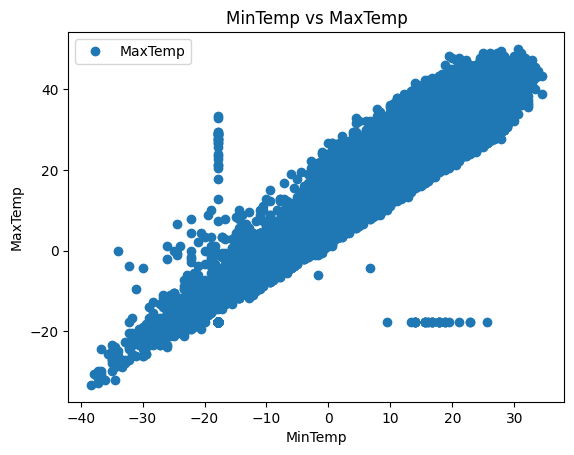

In [ ]:
dataset.plot(x='MinTemp',y='MaxTemp',style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.savefig('min_max_temp.jpeg', dpi=300)

ดูการกระจายตัวของ MaxTemp

<ipython-input-38-876fdbb18738>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




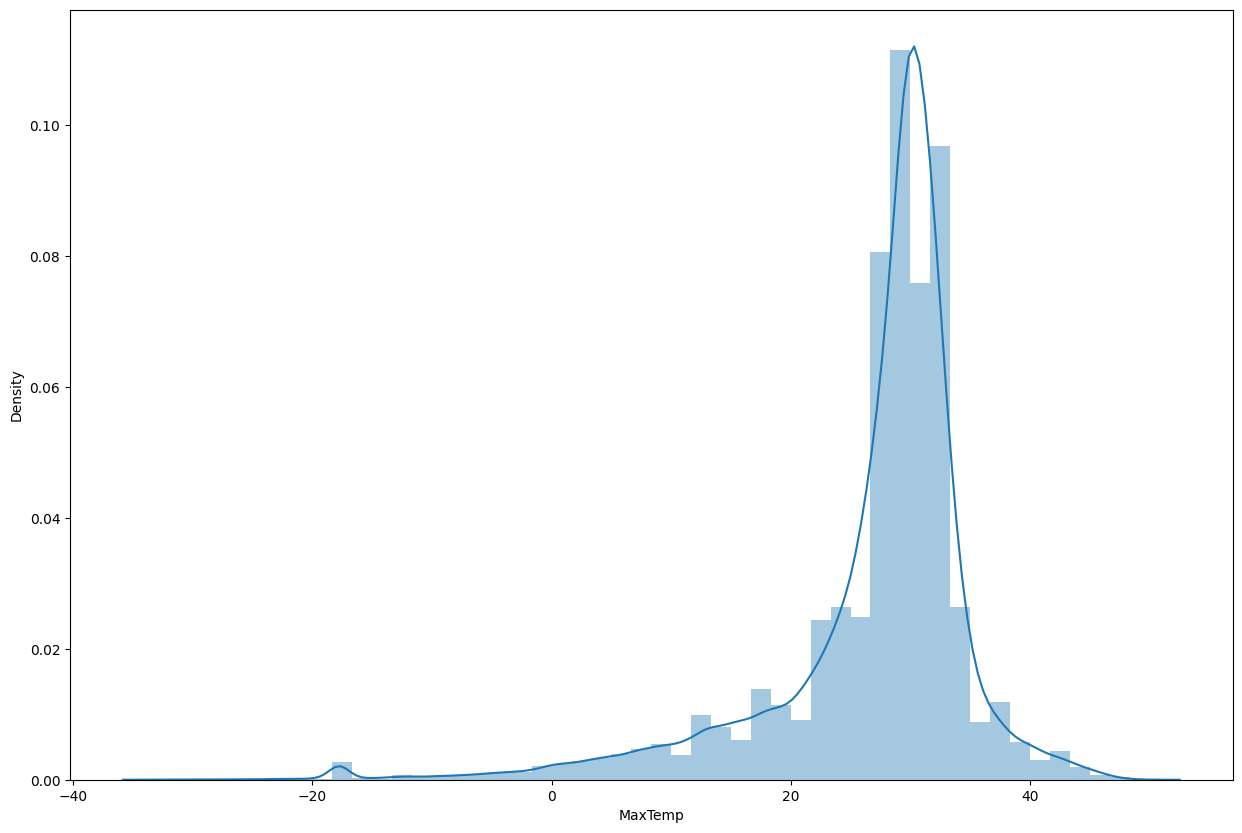

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])
plt.savefig('dis_max_temp.jpeg',dpi=300)

แยกข้อมูลเป็น Input Data(x) และ ผลเฉลย(y)

In [ ]:
x=dataset['MinTemp'].values.reshape(-1,1)
y=dataset['MaxTemp'].values.reshape(-1,1)

x.shape

(119040, 1)

สุ่มแบ่งข้อมูล สำหรับเทรน 80% สำหรับเทส 20%

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((95232, 1), (23808, 1), (95232, 1), (23808, 1))

นิยามโมเดล เอา x_train(ข้อมูลที่จะใช้เทรน) เข้าโมเดลทีเดียวหมด 95232 แถว

In [ ]:
W=tf.Variable(tf.random.uniform([1],-1.0,1.0))
b=tf.Variable(tf.random.uniform([1],-1.0,1.0))

y = W * x_train + b

นิยาม loss function(สมการในหนังสือ)

In [ ]:
loss=tf.reduce_mean(tf.square(y-y_train))

ตั้ง optimizer เป็น Gradient Descent(GD) และตั้ง Learning Rate เป็น 0.0001

In [ ]:
optimizer=tf.train.GradientDescentOptimizer(0.0001)

train=optimizer.minimize(loss)

เคลียร์ Tensorflow Variable

In [ ]:
init=tf.global_variables_initializer()

สร้างเซสชั่นเพื่อเคลียร์ค่า Variable

In [ ]:
sess=tf.Session()
sess.run(init)

# เทรนโมเดล

**เทรนโมเดล ด้วยเซสชั่น train [sess.run(train)]**

In [ ]:
history=[]
wb=[]

for step in range(EPOCH):
    sess.run(train)
    history.append(sess.run(loss))
    print(step, sess.run(W),sess.run(b),sess.run(loss))
    wb.append([sess.run(W)[0],sess.run(b)[0],sess.run(loss)])

0 [-0.06100547] [-0.35642722] 895.80646
1 [0.05403034] [-0.35072905] 768.2843
2 [0.160159] [-0.34544155] 659.74243
3 [0.25807005] [-0.34053293] 567.35583
4 [0.3483997] [-0.33597386] 488.71994
5 [0.43173486] [-0.33173728] 421.78806
6 [0.50861704] [-0.32779822] 364.81818
7 [0.57954586] [-0.32413363] 316.32742
8 [0.6449821] [-0.3207223] 275.05396
9 [0.70535105] [-0.3175446] 239.92343
10 [0.76104504] [-0.31458247] 210.0215
11 [0.8124259] [-0.3118192] 184.57002
12 [0.85982764] [-0.3092394] 162.9065
13 [0.9035582] [-0.30682883] 144.4672
14 [0.9439019] [-0.30457443] 128.77217
15 [0.9811209] [-0.30246413] 115.413
16 [1.015457] [-0.30048674] 104.041985
17 [1.0471336] [-0.298632] 94.36322
18 [1.0763564] [-0.29689038] 86.12481
19 [1.1033155] [-0.29525316] 79.1124
20 [1.1281861] [-0.29371223] 73.14347
21 [1.1511298] [-0.29226014] 68.062744
22 [1.1722959] [-0.29089004] 63.738014
23 [1.191822] [-0.28959554] 60.05674
24 [1.209835] [-0.28837082] 56.923172
25 [1.2264522] [-0.28721046] 54.255753
26 [1.2

# ทดสอบโมเดล

เอา Weight(W) และ Bias(b) จากการเทรนโมเดล มาเก็บไว้ในตัวแปร M,C ตามลำดับ

In [ ]:
M=sess.run(W)
C=sess.run(b)

นิยาม Function Predict

In [ ]:
def predict(X,M,C):
  y = M*X+C
  return y[0]

แปลงค่า loss จากการเทรนที่เป็น list มาเป็น dataframe

In [ ]:
df = pd.DataFrame(history, columns=['loss'])

พลอตกราฟค่า loss

In [ ]:
h1=go.Scatter(y=df['loss'],
                    mode="lines",
                    line=dict(
                    	width=2,
                    	color='blue'),
                    name="loss")

data=[h1]

layout1=go.Layout(title='Loss',
                   xaxis=dict(title='Epochs'),
                   yaxis=dict(title=''))
fig1=go.Figure(data, layout=layout1)
plotly.offline.iplot(fig1)

ให้โมเดลที่สร้างทำนายผล MaxTemp

In [ ]:
y_pred=[predict(i, M, C) for i in x_test]

y_test.shape

(23808, 1)

In [ ]:
y_test=y_test.reshape(-1)
y_test.shape

(23808,)

แสดงผลการทำนาย

In [ ]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df.head(10)

,Actual,Predicted
0,17.777778,15.642048
1,28.333333,24.296424
2,30.555556,32.164039
3,32.222222,29.803755
4,16.666667,3.840625
5,30.555556,36.097847
6,28.888889,30.590516
7,30.555556,32.164039
8,28.888889,33.737562
9,21.666667,25.083186


พล็อตกราฟเปรียบเทียบค่าที่โมเดลทำนายกับค่าจริง

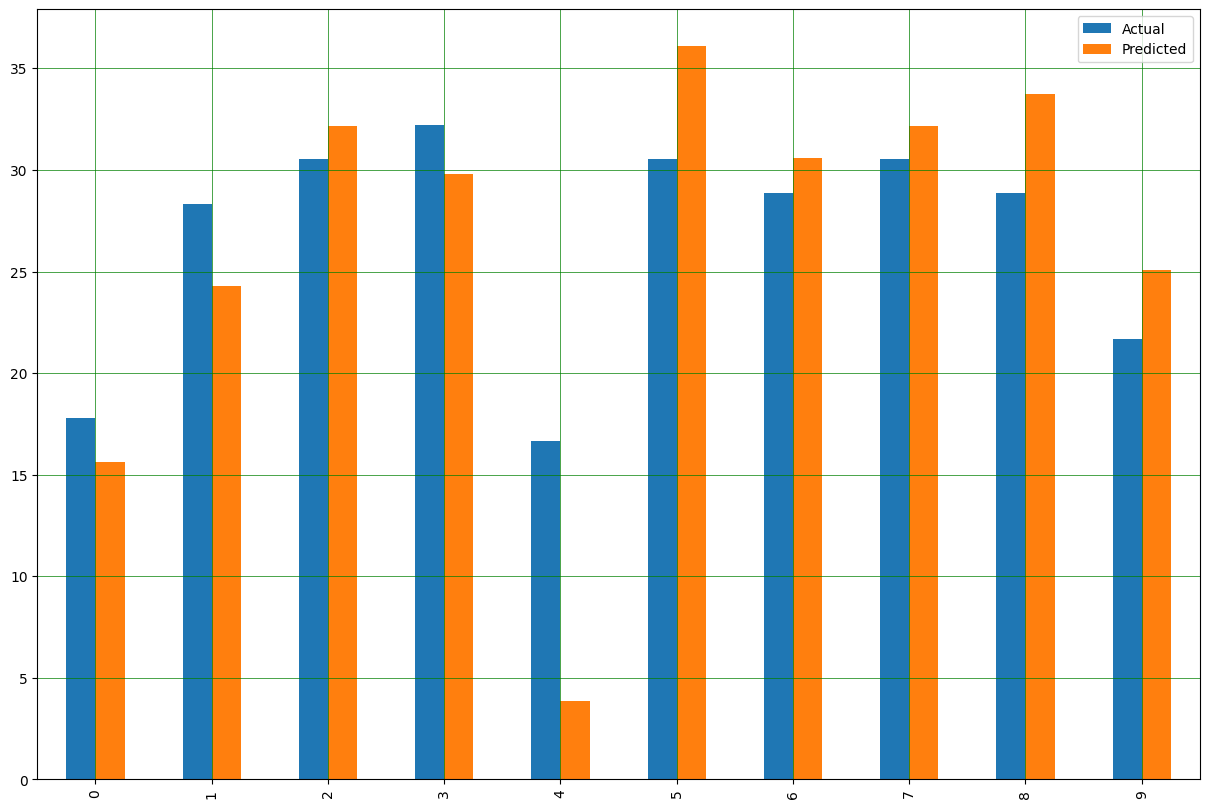

In [ ]:
df1=df.head(10)
df1.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('actual-predict.jpeg',dpi=300)

แสดงโมเดลที่ถูกเทรนใน Epoch แรก

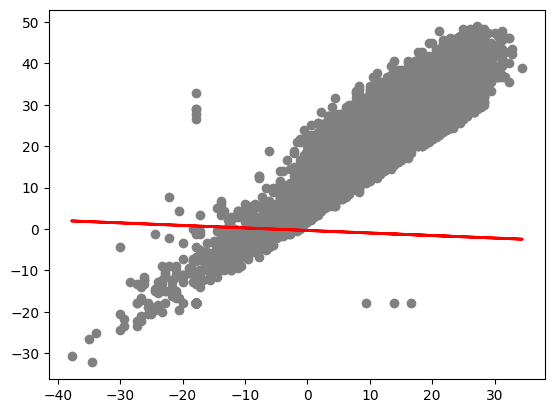

In [ ]:
M=[i[0] for i in wb]
L=[i[2] for i in wb]
C=[i[1] for i in wb]
y_pred=[predict(i, M[0], C[0]) for i in x_test]

plt.scatter(x_test,y_test,color='gray')
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.savefig('min_max_temp1.jpeg',dpi=300)

แสดงโมเดลที่ถูกเทรนใน Epoch ที่ 5

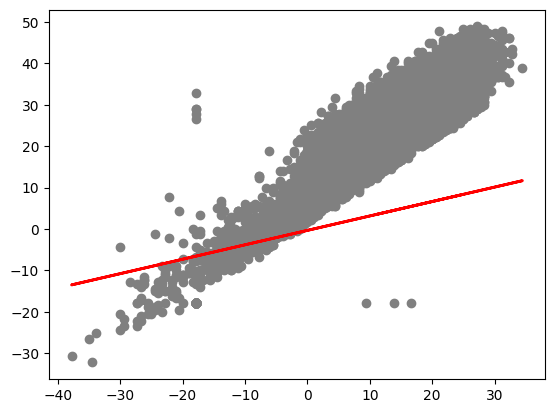

In [ ]:
y_pred=[predict(i, M[4], C[4]) for i in x_test]

plt.scatter(x_test,y_test,color='gray')
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.savefig('min_max_temp1.jpeg',dpi=300)

แสดงโมเดลที่ถูกเทรนใน Epoch ที่ 10

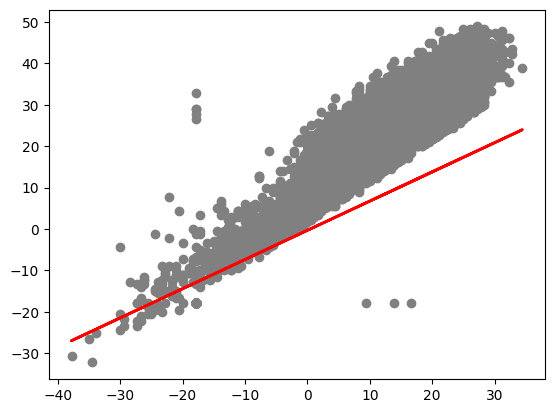

In [ ]:
y_pred=[predict(i, M[9], C[9]) for i in x_test]

plt.scatter(x_test,y_test,color='gray')
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.savefig('min_max_temp1.jpeg',dpi=300)

แสดงโมเดลที่ถูกเทรนใน Epoch สุดท้าย

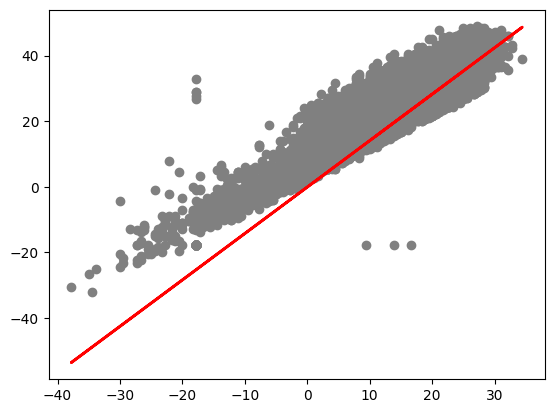

In [ ]:
y_pred=[predict(i, M[499], C[499]) for i in x_test]

plt.scatter(x_test,y_test,color='gray')
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.savefig('min_max_temp1.jpeg',dpi=300)

ดูค่า loss เทียบกับค่า Weight

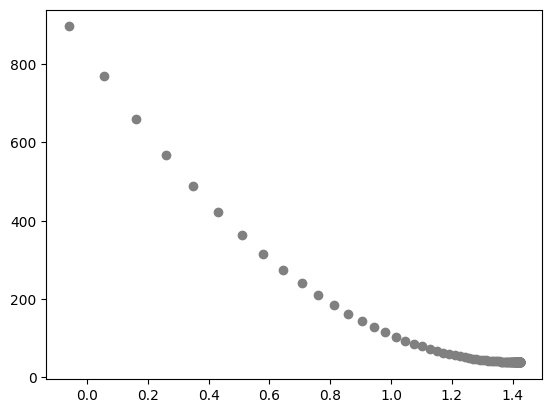

In [ ]:
plt.scatter(M, L,color='gray')
plt.savefig('weight.jpeg',dpi=300)

ดูค่า loss เทียบกับค่า Bias

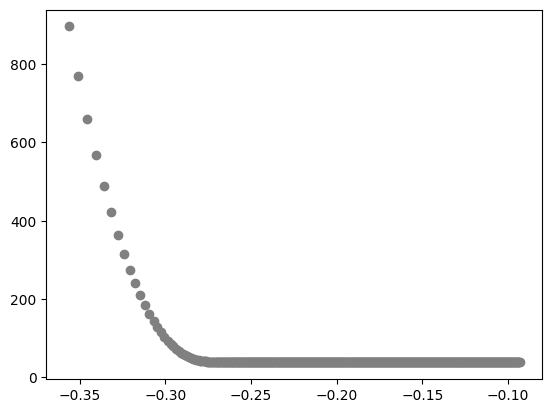

In [ ]:
plt.scatter(C,L,color='gray')
plt.savefig('bias.jpeg',dpi=300)

ดูค่า loss เทียบกับค่า Weight และ Bias

In [ ]:
import plotly.express as px

df=pd.DataFrame({'W':M,'Bias':C,'Loss':L})
fig=px.scatter_3d(df,x='W',y='Bias',z='Loss')
fig.show()

วัดประสิทธิภาพโมเดลด้วย Mean Absolute Error, Mean Squared Error, Root Mean Squared Error

In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.643053909158561
Mean Squared Error: 38.50470127301752
Root Mean Squared Error: 6.205215650806789
